# Transformação de dados com Scikit-Learn

## Um cenário para motivação

Imagine que vamos construir um classificador para o famoso *dataset* [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set). Trata-se de um *dataset* composto de quatro informações sobre flores do tipo Iris: comprimento e largura de suas pétalas, e comprimento e largura de suas sépalas:

<img src="https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/image.png" width=50%/>

Neste *dataset* temos 3 tipos de Iris, com 50 exemplos de cada. Os tipos são: "Iris setosa", "Iris versicolor" e "Iris virginica":

Iris setosa

<img src="https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/setosa.png" width=33%/>

Iris versicolor

<img src="https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/versicolor.png" width=33%/>

Iris virginica

<img src="https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/virginica.png" width=33%/>

Este *dataset* pode ser facilmente obtido através da nossa principal biblioteca Python para Machine Learning: [Scikit-Learn](https://scikit-learn.org/)

<img src="https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/sklearn-logo.png" width=25%/>


In [1]:
from sklearn.datasets import load_iris
dataset = load_iris(as_frame=True)

In [2]:
print(dataset.DESCR)  # type: ignore

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
df = dataset.frame  # type: ignore
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
target_names = dataset.target_names  # type: ignore
print(target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.drop(columns='target').copy()
y = df['target'].copy()

Como de costume, vamos efetuar a separação treino-teste antes de prosseguir:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

**Atividade**

Explore o *dataset* de treino. São apenas 4 *features* contínuas e um *target* categórico, é simples, não precisa espernear de frustração!

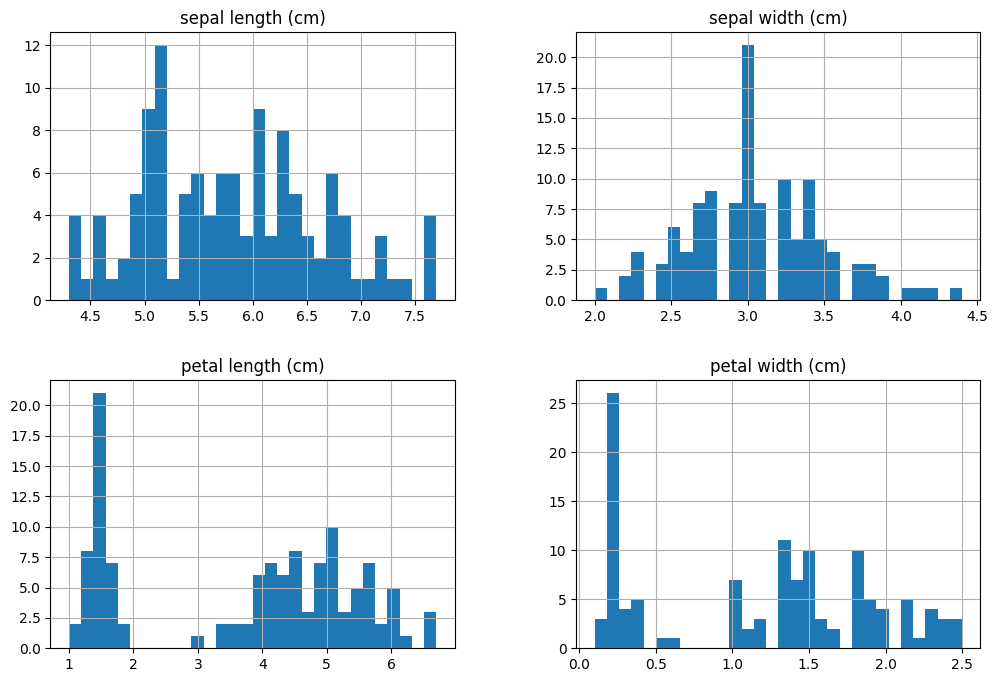

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X_train.hist(
    bins = 30,
    figsize=(12,8)
)
plt.show()


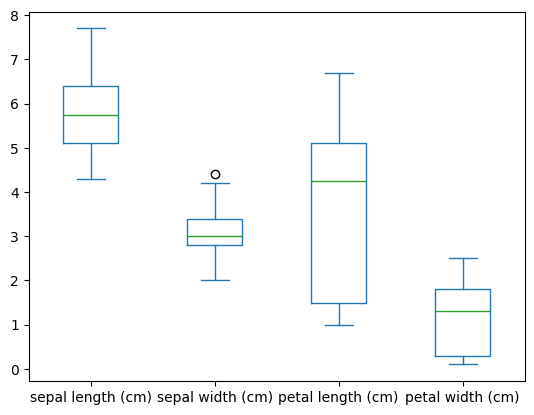

In [9]:
X_train.plot.box()
plt.show()

Suponha que você e sua equipe decidiram testar um classificador do tipo "k-Nearest Neighbors" - k-vizinhos mais próximos.

### Classificador KNN


O que é um classificador "k-Nearest Neighbors"?

Este é um modelo super simples:

- Define-se um valor $k$ inteiro positivo de vizinhos a serem buscados (já explico a seguir). Este valor impacta a capacidade de *generalização* do classificador, ou seja, controla se estamos em *overfitting* ou *underfitting* (lembra da aula 1?)
- No *treinamento* não tem muito a ser feito, é só guardar o *dataset* de treino na memória.
- Para fazer uma predição:
    - Devemos pegar o vetor de *features* da flor para a qual queremos saber o tipo (setosa, versicolor ou virginica) e localizar os $k$ vizinhos mais próximos desta nova flor no conjunto de treino, ou seja, os $k$ pontos de treino cujos vetores de *features* tem a menor distância em relação ao vetor de *features* desta nova flor.
    - Agora estes $k$ vizinhos "votam" entre si para decidir qual a classe que eles "acham" que esta nova flor deve ter. Cada um "vota" com sua própria classe.

Por exemplo, imagine que nosso classificador usa $k = 3$ vizinhos (escolha nossa). Temos agora uma nova flor Iris (do conjunto de teste, ou então de algum usuário do nosso aplicativo viral "Que flor Iris é essa?") e queremos saber o que nosso classificador acha dela. Ao localizar os quatro (valor de $k$, lembra?) vizinhos mais próximos da nova flor, vemos que estes são 2 setosas (vermelho) e uma versicolor (azul). Pela democracia das flores Iris, nosso classificador decide então que a nova flor é uma setosa!

<img src="https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/knn.png" width=50%/>

Porém, imagine que mudarmos o nosso $k$ para $5$, logo $k=5$. Note que pela ilustração acima, o cenário muda, tão logo, segundo a nova classificação, nossa nova flor seria uma versicolor (azul).

Sim, tosco assim mesmo. Mas é um modelo de classificação surpreendentemente poderoso, embora pouco eficiente na geração de predições (cada nova predição requer a busca dos $k$ vizinhos mais próximos no conjunto de treino inteirinho!). Você mesmo usa esse classificador o tempo todo, ou a versão "regressor" dele, quer ver?

**Atividade**

Discuta com seus colegas e pense em situações onde **você** foi o classificador "k-Nearest Neighbors" humano!

Este classificador já está implementado no Scikit-Learn:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

Podemos treinar esse modelo criado:

In [11]:
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Agora podemos usar o modelo já treinado para fazer novas predições:

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Aparentemente esse classificador já acertou tudo sem preprocessamento nenhum, sem nada extra!

MAAAAASSSS... faz-de-conta que não foi assim, só para a gente brincar um pouco.

### Normalização de dados

Ok, voltando ao tema da aula. Bem, como o classificador "k-Nearest Neighbor" efetua um cálculo de distâncias entre pontos, é importante que as *escalas* das *features* sejam parecidas. Por que?

**Atividade**

Se as larguras de pétala e sépala fossem sempre da ordem de poucos centímetros, mas os respectivos comprimentos fossem da ordem de **dezenas** de centímetros (sei lá, são flores alienígenas), como isso impactaria esse classificador "k-Nearest Neighbors"?

Portanto, sendo cauteloso, você gostaria de "normalizar" as features, ou seja, para cada feature:

- Subtrai o valor da mediana;
- Divide pelo valor do intervalo inter-quartil.

Podemos fazer isso com nosso *dataset* de treino facilmente, não?

In [14]:
import pandas as pd


def normalize(some_X: pd.DataFrame) -> pd.DataFrame:
    median_value_per_column = some_X.median()
    iqr_value_per_column = some_X.quantile(0.75) - some_X.quantile(0.25)
    return (some_X - median_value_per_column) / iqr_value_per_column


X_train_normalized = normalize(X_train)

In [15]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [16]:
X_train_normalized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,-0.884615,1.000000,-0.902778,-0.733333
15,-0.038462,2.333333,-0.763889,-0.600000
65,0.730769,0.166667,0.041667,0.066667
11,-0.730769,0.666667,-0.736111,-0.733333
42,-1.038462,0.333333,-0.819444,-0.733333
...,...,...,...,...
71,0.269231,-0.333333,-0.069444,0.000000
106,-0.653846,-0.833333,0.069444,0.266667
14,0.038462,1.666667,-0.847222,-0.733333
92,0.038462,-0.666667,-0.069444,-0.066667


(Pandas, que beleza!)

E com isso podemos treinar nosso modelo:

In [17]:
model.fit(X_train_normalized, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Fazendo novas predições

Ok, o modelo está treinado. Agora suponha que queremos prever a classe de uma nova flor, com os seguintes atributos:

- Comprimento da sépala: $6.1$ cm
- Largura da sépala: $2.8$ cm
- Comprimento da pétala: $4.7$ cm
- Largura da pétala: $1.2$ cm

Para usar o modelo para fazer predições, devemos montar um novo *Dataframe* com esses dados e então pedir ao modelo que faça as predições:

In [18]:
# Note que as colunas deste novo Dataframe são as mesmas do DataFrame de treino.
X_nova_flor = pd.DataFrame(
    {
        'sepal length (cm)': [6.1],
        'sepal width (cm)': [2.8],
        'petal length (cm)': [4.7],
        'petal width (cm)': [1.2],
    }
)

In [19]:
y_pred_da_nova_flor = model.predict(X_nova_flor)

In [20]:
y_pred_da_nova_flor

array([2])

In [21]:
classe_da_nova_flor = y_pred_da_nova_flor[0]
print(f'A nova flor pertence à classe {classe_da_nova_flor}')

A nova flor pertence à classe 2


Ok, e esse número significa o que?

In [22]:
nome_da_classe_da_nova_flor = target_names[classe_da_nova_flor]
print(f'A nova flor pertence à classe "{nome_da_classe_da_nova_flor}"')

A nova flor pertence à classe "virginica"


Missão cumprida! Temos a classe da nova flor!

Exceto que... essa flor não foi escolhida ao acaso, trata-se da primeira flor do *dataset* de teste, e eu sei que ela é, na verdade, uma Iris Versicolor... o classificador errou.

O que deu errado aqui? Ah, faltou "normalizar" as *features* da nova flor! Vamos tentar de novo:

In [23]:
X_nova_flor_normalizada = normalize(X_nova_flor)

In [24]:
X_nova_flor_normalizada

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,NaN,NaN,NaN,NaN


Ops, deu ruim...

**Atividade**

Por que?

Pois bem, então não dá para "normalizar" uma amostra só. O certo é **usar os parâmetros de normalização que foram calculados no conjunto de treino**!

Vamos modificar nosso código para separar o **aprendizado dos parâmetros de normalização** da **aplicação da operação de normalização**:

In [25]:
def compute_normalization_parameters(
    some_X: pd.DataFrame,
) -> tuple[pd.Series, pd.Series]:
    median_value = some_X.median()
    iqr_value = some_X.quantile(0.75) - some_X.quantile(0.25)
    return median_value, iqr_value


def normalize_with_parameters(
    some_X: pd.DataFrame,
    median_value: pd.Series,
    iqr_value: pd.Series,
) -> pd.DataFrame:
    return (some_X - median_value) / iqr_value

Podemos agora normalizar o conjunto de treino da seguinte maneira:

In [26]:
median_value_train, iqr_value_train = compute_normalization_parameters(X_train)
X_train_normalized = normalize_with_parameters(X_train, median_value_train, iqr_value_train)

Podemos treinar o classificador com esse *dataset* normalizado:

In [27]:
model.fit(X_train_normalized, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Agora, a nova flor. Vamos normaliza-la com os parâmetros aprendidos:

In [28]:
X_nova_flor_normalizada = normalize_with_parameters(X_nova_flor, median_value_train, iqr_value_train)

In [29]:
X_nova_flor_normalizada

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.269231,-0.333333,0.125,-0.066667


Ah, muito melhor! Vamos fazer a predição:

In [30]:
y_pred_da_nova_flor_normalizada = model.predict(X_nova_flor_normalizada)
y_pred_da_nova_flor_normalizada

array([1])

In [31]:
classe_da_nova_flor = y_pred_da_nova_flor_normalizada[0]
nome_da_classe_da_nova_flor = target_names[classe_da_nova_flor]
print(f'A nova flor pertence à classe "{nome_da_classe_da_nova_flor}"')

A nova flor pertence à classe "versicolor"


Tudo está correto agora, que beleza!

### Organizando o código

Nosso código de normalização de dados tem:

- os parâmetros da normalização
- a função que ***ajusta*** esses parâmetros
- a função que ***transforma*** os dados

Podemos organizar esses pedaços de solução em uma entidade unificada: uma *classe*.

In [32]:
from typing_extensions import Self


class Normalizer:
    def __init__(self):
        self.median_value = None
        self.iqr_value = None

    def fit(self, some_X: pd.DataFrame) -> Self:
        self.median_value, self.iqr_value = compute_normalization_parameters(some_X)
        return self

    def transform(self, some_X: pd.DataFrame) -> pd.DataFrame:
        if self.median_value is None or self.iqr_value is None:
            raise ValueError(
                'The normalizer instance is not fitted yet. '
                "Call 'fit' with appropriate data before using this method."
            )
        return normalize_with_parameters(some_X, self.median_value, self.iqr_value)

    def fit_transform(self, some_X: pd.DataFrame) -> pd.DataFrame:
        return self.fit(some_X).transform(some_X)

Vamos testar o procedimento anterior para ver se tudo ainda funciona. Vamos criar nosso normalizador:

In [33]:
normalizer = Normalizer()

Agora vamos:

- Ajustar e já aplicar o normalizador nos dados de treino
- Treinar o classificador

In [34]:
X_train_normalized = normalizer.fit_transform(X_train)
model.fit(X_train_normalized, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Ficou limpinho! Vamos usar o normalizador e o classificador para fazer a predição para a nova flor:

In [35]:
X_nova_flor_normalizada = normalizer.transform(X_nova_flor)
y_pred_da_nova_flor_normalizada = model.predict(X_nova_flor_normalizada)

In [36]:
classe_da_nova_flor = y_pred_da_nova_flor_normalizada[0]
nome_da_classe_da_nova_flor = target_names[classe_da_nova_flor]
print(f'A nova flor pertence à classe "{nome_da_classe_da_nova_flor}"')

A nova flor pertence à classe "versicolor"


Pronto, ficou joia! Em resumo, nesta seção vimos:

- Nosso primeiro classificador: o "k-Nearest Neighbors"!
- Como implementar um *transformador* de dados para normalizar valores

A boa notícia é que ***Scikit-Learn tem VÀRIOS transformadores já implementados***! Vamos explorar alguns deles neste *notebook*.

## Transformadores no Scikit-Learn

O Scikit-Learn já tem vários transformadores implementados. Explore a documentação do Scikit-Learn em https://scikit-learn.org/stable/data_transforms.html, em particular as seções de [pré-processamento](https://scikit-learn.org/stable/modules/preprocessing.html) de dados e de [imputação de valores faltantes](https://scikit-learn.org/stable/modules/impute.html).

**Atividade**

Consulte a documentação do Scikit-Learn e descubra transformadores para as seguintes tarefas:

- Normalizar as colunas, mas desta vez através da subtração da *média* e divisão pelo *desvio padrão*
- Discretizar uma *feature* contínua e transformá-la em categórica, através da categorização dos valores contínuos em *bins*, ou faixas de valores
- Adicionar novas colunas ao *dataset* que são termos *polinomiais* das colunas existentes, para um grau especificado de polinômio
- Transformar uma *feature* categórica em um conjunto de *features* numéricas binárias (valendo zero ou um) sendo uma *feature* binária por categoria. Ou seja, se uma *feature* categórica `fruta` tem categorias `abacaxi`, `pera`, `banana`, remove esta *feature* e substitui por três novas *features*: `fruta_abacaxi`, `fruta_pera` e `fruta_banana`
- Preencher dados faltantes, substituindo os buracos pelo valor mediano da *feature*


Vamos praticar com um velho conhecido nosso, o "California Housing" modificado do nosso livro-texto!

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/ml/aula03/housing.csv')

In [38]:
X = df.drop(columns='median_house_value').copy()
y = df['median_house_value'].copy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [41]:
# Este truque é necessário para que as transformações do sklearn retornem DataFrames do
# pandas, ao invés de arrays do NumPy. Isso é útil para manter as colunas nomeadas e
# facilitar a manipulação dos dados. Sem isso, as transformações retornariam arrays do
# NumPy, que não possuem nomes de colunas, o que pode dificultar a interpretação dos
# resultados e a depuração do código.
from sklearn import set_config

set_config(transform_output="pandas")

**Atividade**

Copie todas as colunas de *feature* contínuas do Dataframe `X_train` para um novo Dataframe `X_train_continuas` e faça o seguinte:

1. Treine e aplique (com o método `fit_transform`) um transformador do tipo `SimpleImputer`, gerando assim um novo Dataframe `X_train_imputed`. Observe que não tem mais dados faltantes.
1. Agora treine e aplique neste novo Dataframe um transformador do tipo `PolynomialFeatures(degree=2, include_bias=False)` para criar um Dataframe `X_train_poly`, observe o resultado.
1. Agora treine e aplique um transformador `StandardScaler`, gerando um Dataframe `X_train_scaled`


In [42]:
X_train_continuas = X_train.drop('ocean_proximity',axis = 1).copy()
X_train_continuas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688
...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536


In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train_continuas)

print("Valores faltantes por coluna após imputação:")
print(X_train_imputed.isna().sum())
print(f"Total de valores faltantes: {int(X_train_imputed.isna().sum().sum())}")

X_train_imputed.head()

Valores faltantes por coluna após imputação:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64
Total de valores faltantes: 0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688


In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)

print(f"Formato antes (imputado): {X_train_imputed.shape}")
print(f"Formato depois (polinomial): {X_train_poly.shape}")

X_train_poly.head()

Formato antes (imputado): (16512, 8)
Formato depois (polinomial): (16512, 44)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude^2,longitude latitude,...,total_bedrooms^2,total_bedrooms population,total_bedrooms households,total_bedrooms median_income,population^2,population households,population median_income,households^2,households median_income,median_income^2
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,13740.5284,-3838.9550,...,1234321.0,2948594.0,1190992.0,5097.0458,7043716.0,2845088.0,12176.0212,1149184.0,4918.1216,21.047909
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,13696.0209,-3825.7107,...,26569.0,113774.0,27221.0,760.3624,487204.0,116566.0,3256.0304,27889.0,779.0216,21.760359
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,14949.9529,-4614.4698,...,2414916.0,4621596.0,2306136.0,5730.3750,8844676.0,4413416.0,10966.6250,2202256.0,5472.2500,13.597656
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,14840.1124,-4537.7950,...,401956.0,1380852.0,412100.0,3275.4342,4743684.0,1415700.0,11252.2014,422500.0,3358.0950,26.690656
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,13451.3604,-3864.4536,...,2116.0,2898.0,1104.0,67.5648,3969.0,1512.0,92.5344,576.0,35.2512,2.157373


In [45]:
from sklearn.preprocessing import StandardScaler
StdSclr = StandardScaler()
X_train_scaled = StdSclr.fit_transform(X_train_poly)

X_train_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude^2,longitude latitude,...,total_bedrooms^2,total_bedrooms population,total_bedrooms households,total_bedrooms median_income,population^2,population households,population median_income,households^2,households median_income,median_income^2
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,-1.166868,1.314692,...,0.656435,0.531997,0.725601,1.504737,0.265899,0.557920,1.211232,0.773203,1.594423,0.111379
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,-1.259726,1.355639,...,-0.370910,-0.320183,-0.374194,-0.650350,-0.202975,-0.315825,-0.411886,-0.374998,-0.621245,0.143342
17445,-1.352939,0.988349,-0.046974,1.994289,2.441082,1.363196,2.593828,-0.092320,1.356415,-1.082910,...,1.660679,1.034921,1.779442,1.819466,0.394691,1.060141,0.991166,1.851545,1.891049,-0.222861
14265,-1.127856,0.758691,-0.284730,0.646558,0.230833,0.661262,0.394820,0.682999,1.127249,-0.845860,...,-0.051596,0.060715,-0.010473,0.599499,0.101417,0.100192,1.043130,0.029082,0.759338,0.364530
2271,1.793222,-1.083261,-1.632013,-1.117906,-1.181804,-1.203802,-1.255755,-1.255560,-1.770173,1.235860,...,-0.391711,-0.353514,-0.398875,-0.994631,-0.237533,-0.352668,-0.987529,-0.402967,-1.019387,-0.736107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.402957,1.082087,1.617317,-0.777706,-0.742156,-0.731143,-0.804879,-1.335305,1.407455,-1.170242,...,-0.348903,-0.313150,-0.357718,-0.878367,-0.212158,-0.315748,-0.860851,-0.364619,-0.900815,-0.755115
11964,0.592779,-0.816108,0.507789,-0.400173,-0.499510,-0.613860,-0.496385,1.421304,-0.596677,0.780017,...,-0.300877,-0.281769,-0.302618,0.049954,-0.199498,-0.280018,-0.128658,-0.303876,0.059778,1.106268
5390,0.117604,0.304062,-0.997998,-0.005374,-0.026228,-0.309630,0.052048,-0.911522,-0.125528,-0.201248,...,-0.157267,-0.183764,-0.140943,-0.471693,-0.154867,-0.173813,-0.587919,-0.126668,-0.446748,-0.630309
860,1.187999,-0.727057,-0.522486,-0.078641,0.041040,0.122465,-0.016506,-0.634382,-1.181539,0.835861,...,-0.131497,-0.092947,-0.140820,-0.296335,-0.062218,-0.105266,-0.247725,-0.153664,-0.336541,-0.516986


**Atividade**

1. Copie as colunas categóricas do Dataframe `X_train` (só tem uma, a `ocean_proximity`) para um Dataframe `X_train_categoricas`
1. Aplique o transformador `OneHotEncoder(sparse_output=False)` neste Dataframe e gere um Dataframe `X_train_one_hot_encoded`, observe o resultado


In [46]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder(sparse_output=False)

X_train_categoricas = X_train[['ocean_proximity']].copy()

X_train_one_hot_encoded = one.fit_transform(X_train_categoricas)
X_train_one_hot_encoded

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,0.0,0.0,0.0,0.0,1.0
8267,0.0,0.0,0.0,0.0,1.0
17445,0.0,0.0,0.0,1.0,0.0
14265,1.0,0.0,0.0,0.0,0.0
2271,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
11284,0.0,0.0,0.0,1.0,0.0
11964,1.0,0.0,0.0,0.0,0.0
5390,0.0,1.0,0.0,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0


**Atividade**

Junte os dois resultados finais anteriores (`X_train_scaled` e `X_train_one_hot_encoded`) em um único Dataframe `X_train_transformed`

In [47]:
#agora vamos juntar Xtrain scaled e xtrain one hot
X_train_transformed = pd.concat([X_train_scaled, X_train_one_hot_encoded], axis=1)

X_train_transformed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude^2,longitude latitude,...,population households,population median_income,households^2,households median_income,median_income^2,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.172993,-1.350415,0.428537,1.570557,1.376799,1.081011,1.507507,0.379698,-1.166868,1.314692,...,0.557920,1.211232,0.773203,1.594423,0.111379,0.0,0.0,0.0,0.0,1.0
8267,1.268028,-1.378536,-1.473509,-0.809439,-0.900718,-0.643842,-0.878707,0.420068,-1.259726,1.355639,...,-0.315825,-0.411886,-0.374998,-0.621245,0.143342,0.0,0.0,0.0,0.0,1.0
17445,-1.352939,0.988349,-0.046974,1.994289,2.441082,1.363196,2.593828,-0.092320,1.356415,-1.082910,...,1.060141,0.991166,1.851545,1.891049,-0.222861,0.0,0.0,0.0,1.0,0.0
14265,-1.127856,0.758691,-0.284730,0.646558,0.230833,0.661262,0.394820,0.682999,1.127249,-0.845860,...,0.100192,1.043130,0.029082,0.759338,0.364530,1.0,0.0,0.0,0.0,0.0
2271,1.793222,-1.083261,-1.632013,-1.117906,-1.181804,-1.203802,-1.255755,-1.255560,-1.770173,1.235860,...,-0.352668,-0.987529,-0.402967,-1.019387,-0.736107,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.402957,1.082087,1.617317,-0.777706,-0.742156,-0.731143,-0.804879,-1.335305,1.407455,-1.170242,...,-0.315748,-0.860851,-0.364619,-0.900815,-0.755115,0.0,0.0,0.0,1.0,0.0
11964,0.592779,-0.816108,0.507789,-0.400173,-0.499510,-0.613860,-0.496385,1.421304,-0.596677,0.780017,...,-0.280018,-0.128658,-0.303876,0.059778,1.106268,1.0,0.0,0.0,0.0,0.0
5390,0.117604,0.304062,-0.997998,-0.005374,-0.026228,-0.309630,0.052048,-0.911522,-0.125528,-0.201248,...,-0.173813,-0.587919,-0.126668,-0.446748,-0.630309,0.0,1.0,0.0,0.0,0.0
860,1.187999,-0.727057,-0.522486,-0.078641,0.041040,0.122465,-0.016506,-0.634382,-1.181539,0.835861,...,-0.105266,-0.247725,-0.153664,-0.336541,-0.516986,0.0,1.0,0.0,0.0,0.0


Agora teríamos que repetir TUDO isso para `X_test`, depois para qualquer novo *dataset*, etc.... que tédio. Felizmente o Scikit-Learn tem ferramentas para combinar transformadores, que veremos na próxima aula!